# SD204: TP_SVD-PCA
---


*ZHAO Fubang(Group 4)*

*19:45:28  25 oct 2016*

Je vous prie par avance de me pardonner si je commets des erreurs en français.



In [14]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import timeit
import pandas as pd
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
plt.close()

## Exercice 1. (Retour sur l’algèbre linéaire)
### 1)

In [415]:
def check_equal(_n, _p, _lambda):
    _x = np.random.normal(0, 2, (_n, _p))
    _y = np.random.uniform(-1, 1, (_n, 1))
    _time1 = timeit.default_timer()
    _left = _x.T.dot(np.linalg.solve(_x.dot(_x.T) + _lambda*np.eye(_n), _y))
    _time2 = timeit.default_timer()
    _right = np.linalg.solve(_x.T.dot(_x) + _lambda*np.eye(_p), _x.T.dot(_y))
    _time3 = timeit.default_timer()
    return _left, _right, _time2-_time1, _time3-_time2


def question_1():
    mylambda = 1.e-5
    n = 100
    p = 2000
    _left1, _right1 = check_equal(n, p, mylambda)[0:2]
    print np.allclose(_left1, _right1)
    _left2, _right2 = check_equal(p, n, mylambda)[0:2]
    print np.allclose(_left2, _right2)

question_1()

True
True


Selon le resultat, pour ces deux cas, la function gauche est toujours equal a la function froite.
### 2)

In [416]:
def question_2():
    mylambda = 1.e-5
    n = 100
    p = 2000
    _timeLeft1, _timeRight1 = check_equal(n, p, mylambda)[2:4]
    print "Le temps de la cacaluation gauche(n=100, p=2000)est: " + str(_timeLeft1)
    print "Le temps de la cacaluation droite(n=100, p=2000)est: " + str(_timeRight1)
    _timeLeft2, _timeRight2 = check_equal(p, n, mylambda)[2:4]
    print "Le temps de la cacaluation gauche(n=2000, p=100)est: " + str(_timeLeft2)
    print "Le temps de la cacaluation droite(n=2000, p=100)est: " + str(_timeRight2)

    
question_2()

Le temps de la cacaluation gauche(n=100, p=2000)est: 0.00547695159912
Le temps de la cacaluation droite(n=100, p=2000)est: 0.368697881699
Le temps de la cacaluation gauche(n=2000, p=100)est: 0.621291875839
Le temps de la cacaluation droite(n=2000, p=100)est: 0.00721907615662


Comme $XX^T$ est de taille (n, n), $X^TX$est de taille (p, p)
Lorque n > p, on choisit la formule droite . lorsque n < p, on choisit la formule gauche.
## Exercice 2. (Spectre de matrice aléatoire)
### 3)

In [37]:
def question_3(_n, _p):
    _exp = np.random.exponential(1, (_n, _p))-np.ones((_n, _p))
    _unif = np.random.gamma(2, 2, (_n, _p))-4*np.ones((_n, _p))
    return _exp, _unif

### 4)

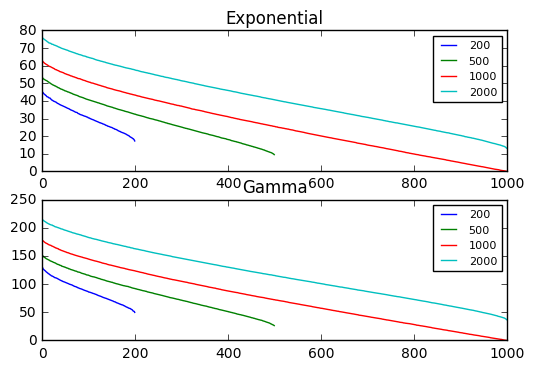

In [38]:
def question_4(_n, _p):
    plt.subplot(211)
    for i in _p:
        plt.plot(np.linalg.svd(question_3(_n, i)[0])[1], label=i)
    plt.title("Exponential")
    plt.legend(loc=0, prop={'size': 8})
    plt.subplot(212)
    for i in _p:
        plt.plot(np.linalg.svd(question_3(_n, i)[1])[1], label=i)
    plt.title("Gamma")
    plt.legend(loc=0, prop={'size': 8})
    plt.show()

question_4(1000, [200, 500, 1000, 2000])

### 5)

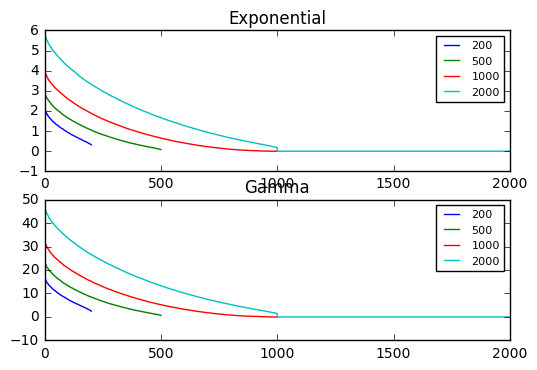

In [41]:
def cal_xtx_n(_n, _p):
    temp1, temp2 = question_3(_n, _p)
    return temp1.T.dot(temp1)/_n, temp2.T.dot(temp2)/_n


def question_5(_n, _p):
    plt.subplot(211)
    for temp_p in _p:
        plt.plot(np.sort(np.linalg.eig(cal_xtx_n(_n, temp_p)[0])[0])[::-1], label=temp_p)
    plt.title("Exponential")
    plt.legend(loc=0, prop={'size': 8})
    plt.subplot(212)
    for temp_p in _p:
        plt.plot(np.sort(np.linalg.eig(cal_xtx_n(_n, temp_p)[1])[0])[::-1], label=temp_p)
    plt.title("Gamma")
    plt.legend(loc=0, prop={'size': 8})
    plt.show()

question_5(1000, [200, 500, 1000, 2000])

## Exercice 3. (Méthode de la puissance itérée)
### 6)

In [44]:
def iteration(_n_iter, _x, _init=0):
    _n = _x.shape[1]
    _p = _x.shape[0]
    array_u = np.array([])
    array_v = np.array([])
    if _init == 0:
        _v = np.ones((_n, 1))/_n
    elif _init == 1:
        _v = np.random.rand(_n).reshape((_n, 1))
    else:
        _v = np.arange(_n).reshape((_n, 1))
    _u = np.array([])
    for i in xrange(_n_iter):
        _u = _x.dot(_v)
        _v = _x.T.dot(_u)
        _u = _u/np.linalg.norm(_u)
        _v = _v/np.linalg.norm(_v)
        array_u = np.append(array_u, _u.reshape(_p))
        array_v = np.append(array_v, _v.reshape(_n))
    return _u.reshape(_p), _v, array_u.reshape((-1, _p)), array_v.reshape((-1, _n))


def question_6(_n_ter, _p, _n):
    _X = np.random.normal(0, 2, (_p, _n))
    return iteration(_n_ter, _X)[:2]

### 7)

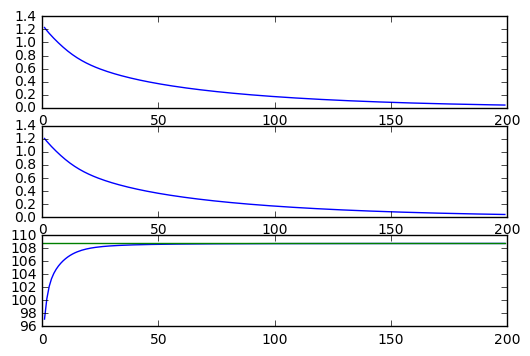

In [453]:
def my_compare(_temp1, _temp2):
    if np.linalg.norm(_temp1-_temp2) < np.linalg.norm(_temp1+_temp2):
        return np.linalg.norm(_temp1-_temp2)
def my_compare(_temp1, _temp2):
    if np.linalg.norm(_temp1-_temp2) < np.linalg.norm(_temp1+_temp2):
        return np.linalg.norm(_temp1-_temp2)
    else:
        return np.linalg.norm(_temp1+_temp2)


def convergence(_x, _n_iter, _init=0):
    diff_u = np.array([])
    diff_v = np.array([])
    sigma = np.array([])
    _u_svd = np.linalg.svd(_x)[0]
    _v_svd = np.linalg.svd(_x)[2]
    array_u, array_v = iteration(_n_iter, _x, _init)[2:4]
    axisx = xrange(1, _n_iter)
    for i in axisx:
        diff_u = np.append(diff_u, my_compare(array_u[i], _u_svd[:, 0]))
        diff_v = np.append(diff_v, my_compare(array_v[i], _v_svd[0, :]))
        sigma = np.append(sigma, array_u[i].dot(_x).dot(array_v[i].reshape((_x.shape[1], 1))))
    return diff_u, diff_v, sigma


def question_7(_n_iter):
    _X = np.random.normal(0, 2, (2000, 100))
    diff_u, diff_v, sigma = convergence(_X, _n_iter)
    axisx = xrange(1, _n_iter)
    plt.subplot(311)
    plt.plot(axisx, diff_u)
    plt.subplot(312)
    plt.plot(axisx, diff_v)
    plt.subplot(313)
    plt.plot(axisx, sigma)
    plt.plot(np.ones(_n_iter)*np.linalg.svd(_X)[1][0])
    plt.show()

question_7(200)

### 8)

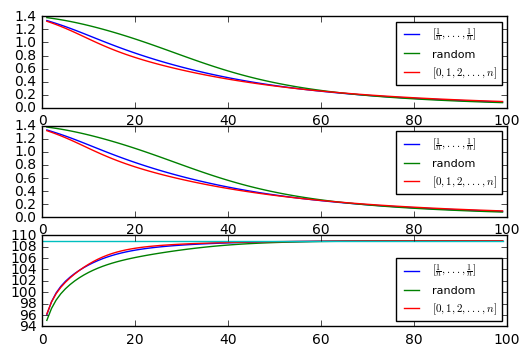

Lorsque les vecteurs initiaux sont 1/n, la solution est: 109.036065895
Lorsque les vecteurs initiaux sont randoms, la solution est: 109.037453009
Lorsque les vecteurs initiaux sont [0,1,2,...,n], la solution est: 109.034588444


In [454]:
def question_8(_n_iter):
    _X = np.random.normal(0, 2, (2000, 100))
    diff_u = [[]]*3
    diff_v = [[]]*3
    sigma = [[]]*3
    for i in xrange(3):
        diff_u[i], diff_v[i], sigma[i] = convergence(_X, _n_iter, i)
    axisx = xrange(1, _n_iter)
    _label = ["$[\\frac{1}{n},...,\\frac{1}{n}]$", "random", "$[0,1,2,...,n]$"]
    plt.subplot(311)
    for i in xrange(3):
        plt.plot(axisx, diff_u[i], label=_label[i])
    plt.legend(loc=0, prop={'size': 8})
    plt.subplot(312)
    for i in xrange(3):
        plt.plot(axisx, diff_u[i], label=_label[i])
    plt.legend(loc=0, prop={'size': 8})
    plt.subplot(313)
    for i in xrange(3):
        plt.plot(axisx, sigma[i], label=_label[i])
    plt.plot(np.ones(_n_iter)*np.linalg.svd(_X)[1][0])
    plt.legend(loc=0, prop={'size': 8})
    plt.show()
    print "Lorsque les vecteurs initiaux sont 1/n, la solution est: "+str(sigma[0][-1])
    print "Lorsque les vecteurs initiaux sont randoms, la solution est: "+str(sigma[1][-1])
    print "Lorsque les vecteurs initiaux sont [0,1,2,...,n], la solution est: "+str(sigma[2][-1])


question_8(100)

Selon les courbe, même si les vecteurs initiaux sont différents, l'algorithme converge encore.<br>
De plus, les solutions de ces trois valeurs d’initialisation sont presque les même.
### 9)

In [47]:
def question_9(_n_iter):
    _X = np.random.normal(0, 2, (2000, 100))
    u, v = iteration(_n_iter, _X)[:2]
    _X2 = _X-u.dot(_X).dot(v)*v.dot(u.reshape((1, 2000))).T
    u2, v2 = iteration(_n_iter, _X2)[:2]
    print 'Deux fois de la puissance itérée: ' + str(u2.dot(_X2).dot(v2))
    print 'Utiliser np.linalg.svd: ' + str(np.linalg.svd(_X)[1][1])
question_9(100)

Deux fois de la puissance itérée: [ 106.97664906]
Utiliser np.linalg.svd: 107.009987799


Selon le résultat, les deux valeurs singulières qui est la seconde plus grand sont presque équals.
## Exercice 4.  (PCA)
### 10)

In [424]:
def question_10(_file_name):
    return pd.read_csv(_file_name, sep=';')

### 11)

In [457]:
def question_11():
    _X = question_10("defraconsumption.csv").as_matrix()[:, 1:5]
    return preprocessing.scale(_X.astype(float))
print question_11()

[[-0.83028135 -0.89096138 -0.78414166 -0.78171514]
 [-0.51150903 -0.6154117  -0.47903269 -0.34998399]
 [ 0.49034683  0.66456098  0.63604179  0.33520127]
 [-0.73464965 -0.76429741 -0.74243611 -0.7237214 ]
 [-0.62991018 -0.5976343  -0.60634435 -0.47456313]
 [-0.71415715 -0.73096479 -0.6875604  -0.62491726]
 [ 0.57003991  0.82233539  0.23215655  1.2953198 ]
 [-0.49329347 -0.53096906 -0.63487972 -0.61632559]
 [ 0.04178864  0.14679425 -0.09270767 -0.16096736]
 [-0.61852545 -0.6687439  -0.52732332 -0.52181728]
 [-0.24966034 -0.30875158 -0.27050498 -0.2060736 ]
 [ 1.43983296  1.40676736  1.09041269  0.52421789]
 [ 2.28230266  2.39563515  2.19890209  2.28550915]
 [-0.93957472 -0.95762662 -0.89389308 -0.82252554]
 [ 2.05916204  1.67120616  2.44035523  2.31128414]
 [-0.21550616 -0.06431235 -0.00490653 -0.63350892]
 [-0.94640555 -0.97762619 -0.87413783 -0.83541304]]


### 12)

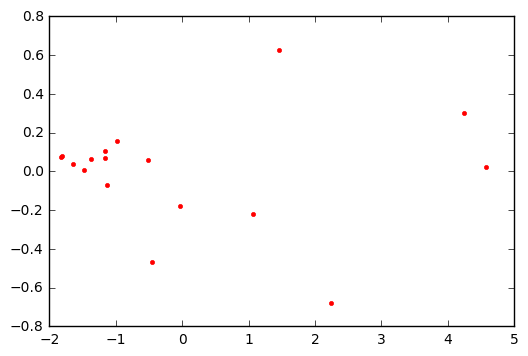

In [463]:
def question_12():
    pca = PCA(2)
    _X2 = pca.fit_transform(question_11())
    plt.plot(_X2[:, 0], _X2[:, 1], 'r.')
    plt.show()
    
question_12()

### 13)

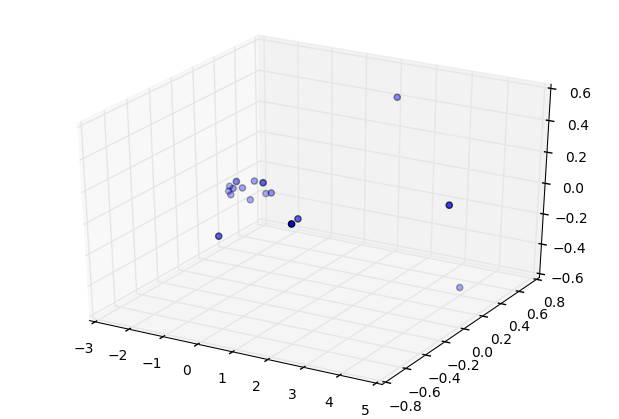

In [464]:
def question_13():
    pca = PCA(3)
    _X3 = pca.fit_transform(question_11())
    ax = Axes3D(fig=plt.figure())
    ax.scatter(_X3[:, 0], _X3[:, 1], _X3[:, 2], 'r.')
    plt.show()

question_13()

### 14)

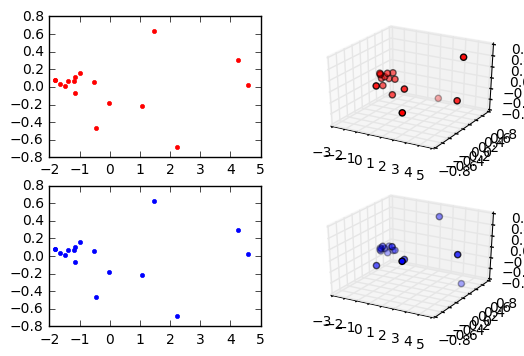

valeurs propres: 0.000442028045654 0.000115871429443
valeurs singuliere: 0.000255107879639 0.000105857849121


In [460]:
def reduce_dim_eig(_n, _x):
    _eig_value, _eig_vector = np.linalg.eig(_x.T.dot(_x))
    _order = _eig_value.argsort()[::-1]
    _eig_vector_proj = _eig_vector[:, _order][:, :_n]
    return _x.dot(_eig_vector_proj)


def reduce_dim_svd(_n, _x):
    _u, _s_value, _v = np.linalg.svd(_x)
    _s = np.diag(_s_value)
    return _u[:, :_n].dot(_s[:_n, :_n])


def question_14():
    _X = question_11()
    _time1 = timeit.default_timer()
    _X_eig2 = reduce_dim_eig(2, _X)
    _time2 = timeit.default_timer()
    _X_eig3 = reduce_dim_eig(3, _X)
    _time3 = timeit.default_timer()
    _X_svd2 = reduce_dim_svd(2, _X)
    _time4 = timeit.default_timer()
    _X_svd3 = reduce_dim_svd(3, _X)
    _time5 = timeit.default_timer()
    fig = plt.figure()
    fig.add_subplot(221).plot(_X_eig2[:, 0], _X_eig2[:, 1], 'r.')
    fig.add_subplot(222, projection='3d').。scatter(_X_eig3[:, 0], _X_eig3[:, 1], _X_eig3[:, 2], c='r')
    fig.add_subplot(223).plot(_X_svd2[:, 0], _X_svd2[:, 1], 'b.')
    fig.add_subplot(224, projection='3d').scatter(_X_svd3[:, 0], _X_svd3[:, 1], _X_svd3[:, 2])
    plt.show()
    print "valeurs propres: "+str(_time2-_time1), _time3-_time2
    print "valeurs singuliere: "+str(_time4-_time3), _time5-_time4

question_14()

## Exercice 5. (Reconnaissance de visages par régression logistique)
### 15)

In [431]:
def question_15():
    lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
    n_samples, h, w = lfw_people.images.shape
    n_features = lfw_people.data.shape[1]
    y = lfw_people.target
    n_classes = lfw_people.target_names.shape[0]
    print("Total dataset size:")
    print("n_samples: %d" % n_samples)
    print("n_features: %d" % n_features)
    print("n_classes: %d" % n_classes)
    print("n_target: %d" % y.shape[0])

question_15()

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7
n_target: 1288


### 16)
lfw_people est une database d'image.<br>
Les variables explicatives sont les features(size: 1850).
### 17)

2


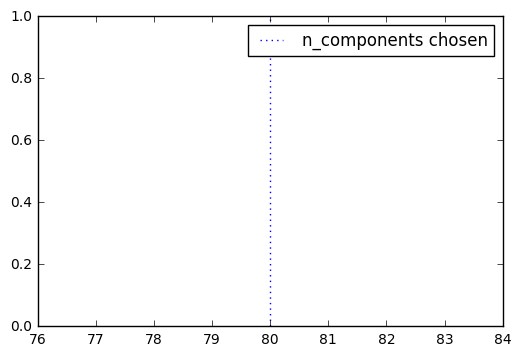

(80, 0.79580745341614911)


In [42]:
def question_17_a(_percent):
    lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
    _X = lfw_people.data
    pca = PCA(_percent)
    pca.fit(_X)
    return pca.n_components_


def question_17_b():
    lfw = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
    pca = PCA()
    reg = LogisticRegression()
    pipe = Pipeline(steps=[('pca', pca), ('reg', reg)])
    n_components = xrange(50, 100, 10)
    estimator = GridSearchCV(pipe, dict(pca__n_components=n_components))
    estimator.fit(lfw.data, lfw.target)
    _n = estimator.best_estimator_.named_steps['pca'].n_components
    plt.axvline(_n, linestyle=':', label='n_components chosen')
    plt.legend(prop=dict(size=12))
    plt.show()
    return _n, estimator.best_score_

print question_17_a(.3)
print question_17_b()

## Exercice 6. (Analyse du jeu de données auto-mpg)
### 18）

In [6]:
def question_18():
    _file = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original'
    _name = ['mpg', 'cylinders', 'displacement', 'horsepower', 
             'weight', 'acceleration', 'model_year', 'origin', 'car_name']
    df = pd.read_csv(_file, delim_whitespace=True, names=_name, na_values='NA')
    df = df.dropna()
    return df
print question_18().shape

(392, 9)


Le marqueur utilisé pour les données manquantes est '**NA**'
### 19)

In [18]:
def question_19():
    data = question_18().as_matrix()[:9, :7]
    _Y = np.array(data[:, 0])
    _X = np.array(data[:, 1:7])
    reg = LinearRegression()
    reg.fit(_X, _Y)
    _theta = np.insert(reg.coef_, 0, reg.intercept_)
    print 'Le vrai mpg est: ' + str(_Y)
    print 'L\'estimateur des moindres carres (theta) est: ' + str(_theta)
    print 'La prediction (y) est: ' + str(reg.predict(_X))

question_19()

Le vrai mpg est: [18.0 15.0 18.0 16.0 17.0 15.0 14.0 14.0 14.0]
L'estimateur des moindres carres (theta) est: [  3.07716954e+01   0.00000000e+00   5.40884757e-02  -9.45305962e-02
  -4.24073671e-03  -1.99367013e-01   0.00000000e+00]
La prediction (y) est: [ 17.83593432  16.15135218  17.02803274  16.08414928  17.15247702
  14.85588522  14.27266143  14.2658702   13.35363761]


Selon le résultat, on peut voir les coefficients de cylinders et model year est 0, parce que dans ce cas-là, les valeurs de cylinders et model year ne change pas, c'est à dire ils ne peuvent pas changer Y.
### 20)

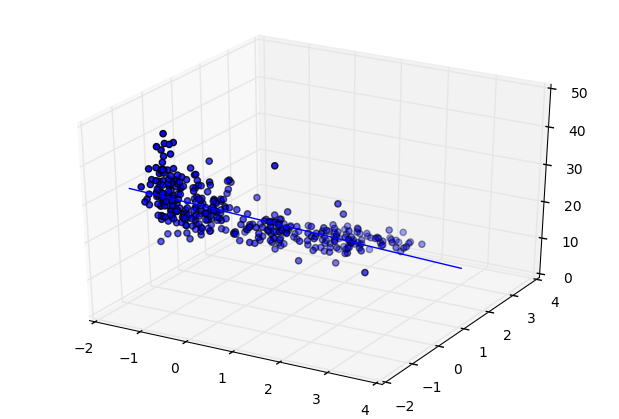

Numero des deux variables qui expliquent le plus la consommation[1 3]. C'est a dire 'displacement' et 'weight'. 
L'estimateur des moindres carres (theta) est: [ 23.44591837  -1.72412019  -4.87878725]


In [17]:
def question_20():
    data = question_18().as_matrix()[:, :7]
    _Y = np.array(data[:, 0])
    _X = preprocessing.scale(np.array(data[:, 1:7]))
    skb = SelectKBest(k=2)
    _X_new = skb.fit_transform(_X, _Y)
    reg = LinearRegression()
    reg.fit(_X_new, _Y)
    _theta = np.insert(reg.coef_, 0, reg.intercept_)
    ax = Axes3D(fig=plt.figure())
    ax.scatter(_X_new[:, 0], _X_new[:, 1], _Y, 'r.')
    ax.plot([3, -1.5], [3, -1.5], [np.array([1, 3, 3]).dot(_theta), np.array([1, -1.5, -1.5]).dot(_theta)])
    plt.show()
    print 'Numero des deux variables qui expliquent le plus la consommation' \
          + str(skb.get_support(True)) +  '. C\'est a dire \'displacement\' et \'weight\'. '
    print 'L\'estimateur des moindres carres (theta) est: ' + str(_theta)


question_20()

### 21)

In [19]:
def question_21():
    data = question_18().as_matrix()[:, :7]
    _Y = np.array(data[:, 0])
    _X = np.array(data[:, 1:7])
    reg = LinearRegression()
    reg.fit(_X, _Y)
    _n = _Y.shape[0]
    print 'le carre de la norme du vecteur des residus est: ' + str(reg.residues_)
    print '|r|^2/(n-p) est: ' + str(reg.residues_/(_X.shape[0]-_X.shape[1]))
    print 'La gauche est: ' + str(reg.residues_+np.linalg.norm(reg.predict(_X)-np.mean(_Y))**2)
    print 'La droite est: ' + str(np.var(_Y)*_n)
    
question_21()

le carre de la norme du vecteur des residus est: 4543.34702471
|r|^2/(n-p) est: 11.7703290796
La gauche est: 23818.9934694
La droite est: 23818.9934694


/Users/Nicolas/Development/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)
/Users/Nicolas/Development/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)
/Users/Nicolas/Development/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


Selon le resultat, la gauche de la function est equal a la droite.
### 22)

In [21]:
def question_22():
    data = question_18().as_matrix()[:, :7]
    _Y = np.array(data[:, 0])
    _X = np.array(data[:, 1:7])
    reg = LinearRegression()
    reg.fit(_X, _Y)
    print reg.predict([[6, 225, 100, 3233, 15.4, 76]])

question_22()

[ 21.77622018]


### 23)

In [24]:
def question_23():
    data = question_18().as_matrix()[:, :7]
    _X = np.array(data[:, 1:7])
    poly = preprocessing.PolynomialFeatures(interaction_only=False)
    _X_new = poly.fit_transform(_X)
    _X_new = preprocessing.scale(preprocessing.normalize(_X_new))
    print _X_new.shape

question_23()

(392, 28)


### 24)

In [30]:
def question_24():
    df = question_18()
    df = df.drop('car_name', axis=1)
    temp = pd.get_dummies(df['origin']).as_matrix()
    data = df.drop('origin', axis=1).as_matrix()
    _Y = np.array(data[:, 0])
    _X = preprocessing.scale(np.append(data[:, 1:], temp, axis=1))
    reg = LinearRegression()
    reg.fit(_X, _Y)
    print '   usa         europe       japan'
    print reg.coef_[-3:]
    
question_24()

   usa         europe       japan
[-0.75153855  0.40804774  0.52183015]


Selon le resultat, le coefficient de **japan** est plus grand, c'est a dire les voitures qui viennent de japan peuvent avoir le plus grand mpg.
### 25)

In [32]:
def question_25():
    df = question_18()
    df = df.drop('origin', axis=1)
    s = pd.Series(df['car_name'])
    brand = []
    for i in s:
        brand.append(i.split(' ')[0])
    brand_new = pd.get_dummies(pd.Series(brand)).as_matrix()
    data = df.as_matrix()[:, 1:7]
    _Y = df.as_matrix()[:, 0]
    _X = np.append(data, brand_new, axis=1)
    reg = LinearRegression()
    reg.fit(_X, _Y)
    print 'Ce qui est la plus efficace en terme de consommation est: '
    print list(pd.get_dummies(pd.Series(brand)))[np.argsort(reg.coef_[-37:])[-1]]

question_25()

Ce qui est la plus efficace en terme de consommation est: 
vw


### 26)

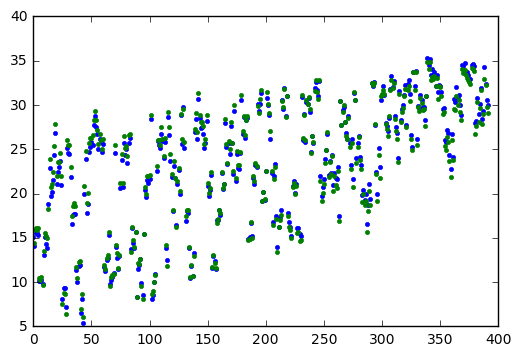

[ 4.85175174 -1.75428634 -4.24624165 -0.61356293 -1.70169133 -3.85481868
 -3.45423834 -1.92166338 -3.47483589 -3.7176226 ]
True


In [35]:
def question_26():
    df = question_18()
    _Y = df.ix[:, 0].as_matrix()
    _X = df.ix[:, 1:7].as_matrix()
    _U = np.linalg.svd(_X, full_matrices=False)[0]
    _H = _U.dot(_U.T)
    df['levier'] = _H.diagonal()
    reg = LinearRegression()
    reg.fit(_X, _Y)
    plt.plot(reg.predict(_X), '.')
    plt.plot(_H.dot(_Y), '.')
    plt.show()
    df = df.sort_values(by='levier', ascending=False)
    _Y2 = df.ix[df.index.values[:3], 0].as_matrix()
    _X2 = df.ix[df.index.values[:3], 1:7].as_matrix()
    print reg.predict(_X2) - _Y2
    print np.allclose(_H.dot(_H), _H) and np.allclose(_H.T, _H)

question_26()

 
$H=H^2$ and $H=H^T$<br>
Donc H est une projection orthogonale<br>
Le résultat H*y et y2 qui est prévue par 'LinearRegression' sont presque équals.
<br>